# Objective:
The goal of this project is to predict the rating from a supermarket sales dataset using regression techniques. The task involves building models to understand how various features of supermarket sales impact the predicted rating.

# Models Used:
1. **Random Forest (RF)**: A simple and reliable model used as a baseline. Random Forest is effective for capturing feature importance and handling non-linear relationships.
2. **Extreme Gradient Boosting (XGBoost)**: XGBoost is employed with the expectation of boosting model accuracy. It is well-suited for handling complex relationships within the data and is optimized for performance and accuracy.
3. **Support Vector Regression (SVR)**: SVR is used with a kernel function to capture more intricate patterns in the data. SVR is useful in non-linear scenarios where relationships between variables are not clearly defined.

# Rationale:
The selected algorithms are appropriate for this case due to the nature of the dataset:
- The dataset consists of 1,000 samples, which is manageable for all three models.
- The relationships between the variables are complex and non-linear, with no clear patterns. Thus, the models chosen are capable of handling this complexity.
The combination of a simple baseline (Random Forest), an accuracy-focused model (XGBoost), and a kernel-based approach (SVR) allows for thorough exploration of the predictive potential in the dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('./supermarket_sales.csv')
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


# EDA & Visualization

Below is some general information about the dataset, including its shape, column names, and summary statistics, obtained through Exploratory Data Analysis (EDA). These insights help to understand the dataset’s structure and characteristics before moving on to the modeling phase.

In [3]:
data.shape

(1000, 17)

In [4]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


Next, there are six visualizations showcasing various variables from the dataset. The conclusion drawn from these visualizations is that the data is well-balanced, with no significant imbalances or skewed distributions in the categorical variables. This balance suggests that the dataset is suitable for modeling without requiring extensive resampling or correction for bias.

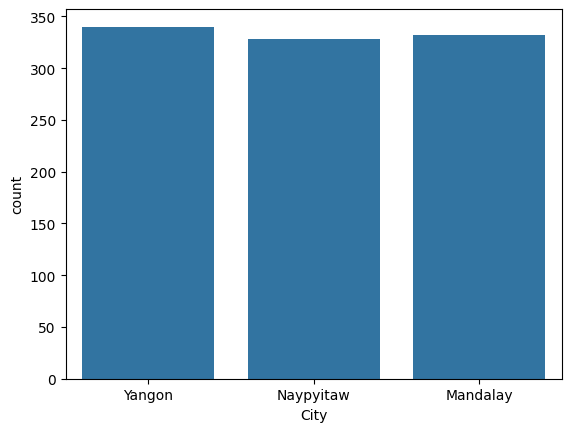

In [7]:
sns.countplot(x='City', data=data)
plt.show()

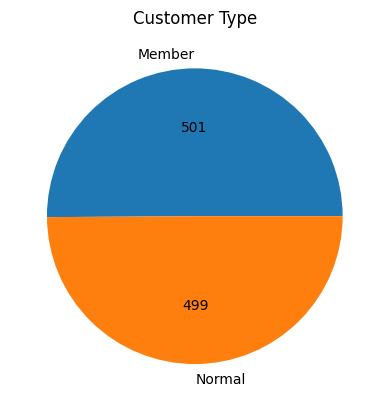

In [8]:
cust_type = data['Customer type'].value_counts()

labels = cust_type.index
value = cust_type.values

plt.title("Customer Type")
plt.pie(value, labels=labels, autopct=lambda pct: f'{int(round(pct * sum(value) / 100.0))}')
plt.show()

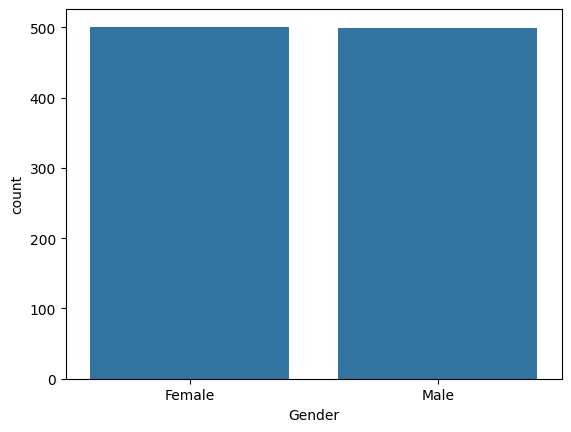

In [9]:
sns.countplot(x='Gender', data=data)
plt.show()

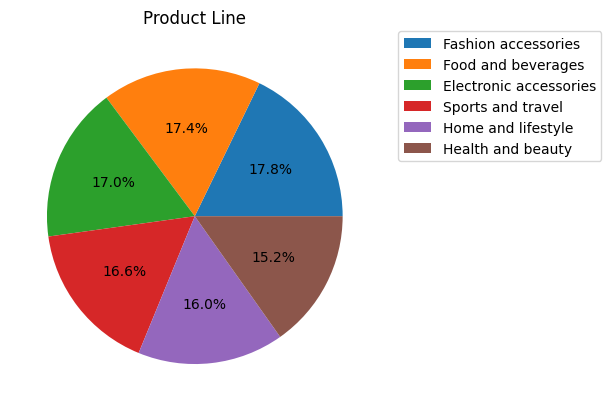

In [10]:
prod_line = data['Product line'].value_counts()

labels = prod_line.index
value = prod_line.values

plt.title("Product Line")
plt.pie(value, autopct='%1.1f%%')
plt.legend(labels, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

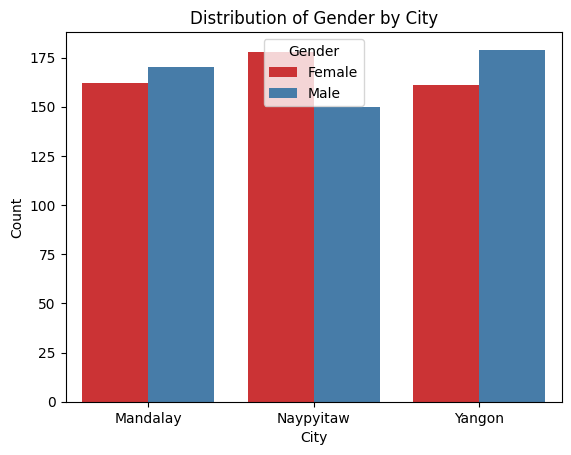

In [11]:
df_count = data.groupby(['City', 'Gender']).size().reset_index(name='Count')
sns.barplot(x='City', y='Count', hue='Gender', data=df_count, palette='Set1')
plt.title('Distribution of Gender by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

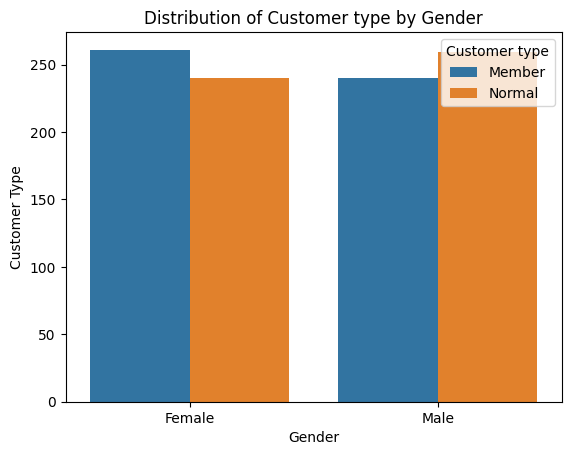

In [12]:
df_count = data.groupby(['Gender', 'Customer type']).size().reset_index(name='Count')
sns.barplot(x='Gender', y='Count', hue='Customer type', data=df_count)
plt.title('Distribution of Customer type by Gender')
plt.xlabel('Gender')
plt.ylabel('Customer Type')
plt.show()

Following that, the next three visualizations will focus solely on the distribution of the numerical variables, providing further insights into the data’s characteristics and helping to understand its range and tendencies.

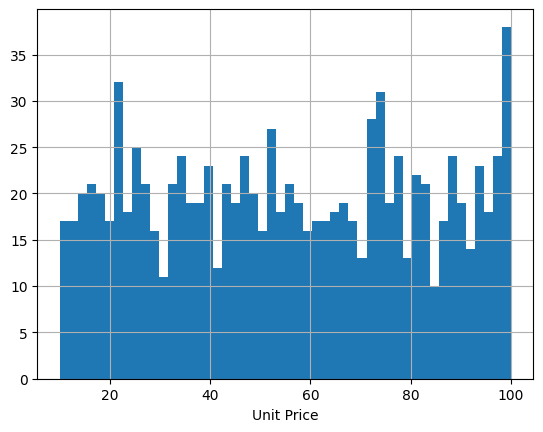

In [13]:
data['Unit price'].hist(bins=50)
plt.xlabel('Unit Price')
plt.show()

<Axes: xlabel='Quantity', ylabel='Count'>

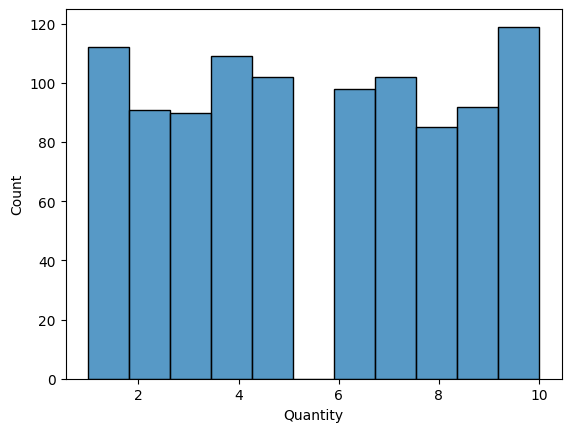

In [14]:
sns.histplot(data['Quantity'])

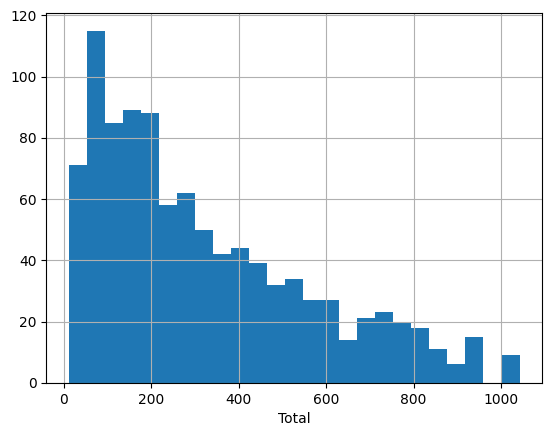

In [15]:
data['Total'].hist(bins=25)
plt.xlabel('Total')
plt.show()

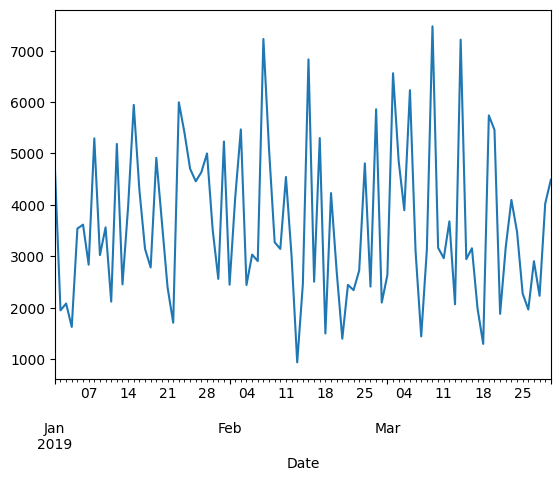

In [16]:
data['Date'] = pd.to_datetime(data['Date'])
data.groupby('Date')['Total'].sum().plot(kind='line')
plt.show()

The line plot above utilizes the time series data to analyze sales trends from January to March 2019. It reveals that the highest total sales occurred around March 9, while the lowest sales were recorded around February 13.

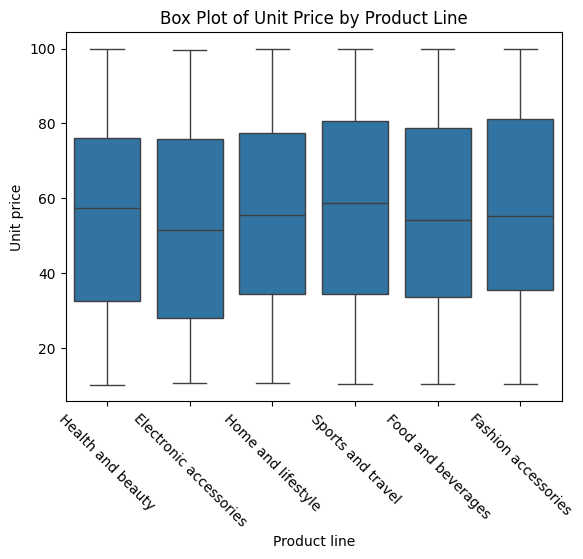

In [17]:
sns.boxplot(x='Product line', y='Unit price', data=data)
plt.title('Box Plot of Unit Price by Product Line')
plt.xticks(rotation=-45, ha='center')
plt.show()

From the visualization of unit prices based on product categories above, it can be observed that the six categories do not exhibit any outliers. Additionally, the average price of items across these categories ranges between 50 and 60.

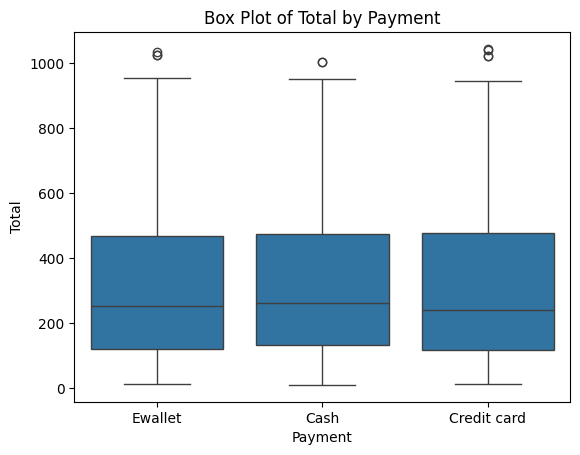

In [18]:
sns.boxplot(x='Payment', y='Total', data=data)
plt.title('Box Plot of Total by Payment')
plt.show()

The insights gained from the visualization above indicate that all three payment methods exhibit 1-2 outliers when analyzed based on total purchases. However, no distinct pattern emerges among the payment methods, as they exhibit similar characteristics.

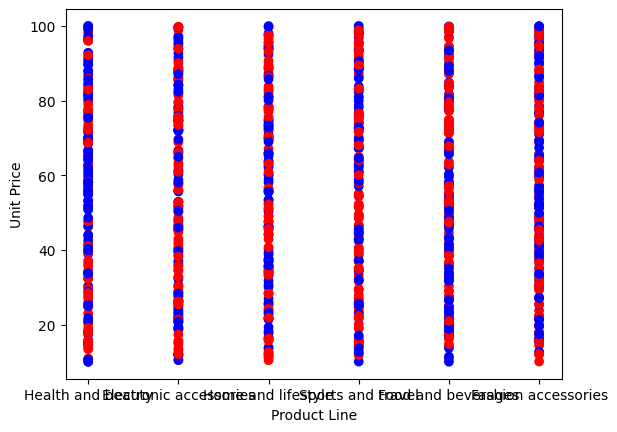

In [19]:
colors = []
for gender in data['Gender']:
    if gender == 'Male':
        colors.append('blue')
    else:
        colors.append('red')

plt.xlabel('Product Line')
plt.ylabel('Unit Price')
plt.scatter(data['Product line'], data['Unit price'], c=colors)
plt.show()

The scatter plot above illustrates the purchases made by males and females based on product type and price. However, it does not reveal any discernible patterns in the data.

# Preprocessing

In [20]:
data.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [21]:
data.duplicated().sum()

0

The dataset does not contain any missing values or duplicated rows, indicating that no further handling is required.

In [22]:
data = data.drop(columns=['Invoice ID', 'Branch', 'Tax 5%', 'Date', 'Time', 'gross margin percentage'])

During the preprocessing phase, several columns that are not needed for prediction have been dropped. Specifically, the following columns were removed:
- Invoice ID: This column was removed as it does not contribute to the prediction.
- Date and Time: These columns were dropped since they are not essential for the predictive modeling process in this case.
- Branch: This column was removed because its information is redundant with the City column.
- Tax 5%: This column was dropped as it merely represents a calculation of 5% of the item price.
- gross margin percentage: This column was removed because its value is constant at 4.761905 across all entries.

In [23]:
num_cols = []
cat_cols = []

for i in data.columns:
    if data[i].dtype == 'object':
        cat_cols.append(i)
    elif "int" in str(data[i].dtype) or "float" in str(data[i].dtype):
        num_cols.append(i)
        
print(num_cols)
print(cat_cols)

['Unit price', 'Quantity', 'Total', 'cogs', 'gross income', 'Rating']
['City', 'Customer type', 'Gender', 'Product line', 'Payment']


At this stage, I have separated the features into two categories: numerical and categorical. The results of this categorization are as follows:
- numerical columns: ['Unit price', 'Quantity', 'Total', 'cogs', 'gross income', 'Rating']
- categorical columns: ['City', 'Customer type', 'Gender', 'Product line', 'Payment']

In [24]:
for i in cat_cols:
    print(f'{i}: {data[i].nunique()}')
    print(data[i].unique())

City: 3
['Yangon' 'Naypyitaw' 'Mandalay']
Customer type: 2
['Member' 'Normal']
Gender: 2
['Female' 'Male']
Product line: 6
['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Payment: 3
['Ewallet' 'Cash' 'Credit card']


Next, I encoded the categorical columns using Label Encoder to convert them into numerical values, making them suitable for the machine learning models. This ensures that the models can interpret and process the categorical data effectively during training and prediction.

In [25]:
encoders = {}

for col in cat_cols:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])
    encoders[col] = dict(zip(encoder.classes_, range(len(encoder.classes_))))
    print(f"Mapping for '{col}':")
    print(encoders[col])

Mapping for 'City':
{'Mandalay': 0, 'Naypyitaw': 1, 'Yangon': 2}
Mapping for 'Customer type':
{'Member': 0, 'Normal': 1}
Mapping for 'Gender':
{'Female': 0, 'Male': 1}
Mapping for 'Product line':
{'Electronic accessories': 0, 'Fashion accessories': 1, 'Food and beverages': 2, 'Health and beauty': 3, 'Home and lifestyle': 4, 'Sports and travel': 5}
Mapping for 'Payment':
{'Cash': 0, 'Credit card': 1, 'Ewallet': 2}


In [26]:
# encoder = LabelEncoder()

# for col in cat_cols :
#     data[col] = encoder.fit_transform(data[col])

In [27]:
data.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment,cogs,gross income,Rating
0,2,0,0,3,74.69,7,548.9715,2,522.83,26.1415,9.1
1,1,1,0,0,15.28,5,80.2200,0,76.40,3.8200,9.6
2,2,1,1,4,46.33,7,340.5255,1,324.31,16.2155,7.4
3,2,0,1,3,58.22,8,489.0480,2,465.76,23.2880,8.4
4,2,1,1,5,86.31,7,634.3785,2,604.17,30.2085,5.3


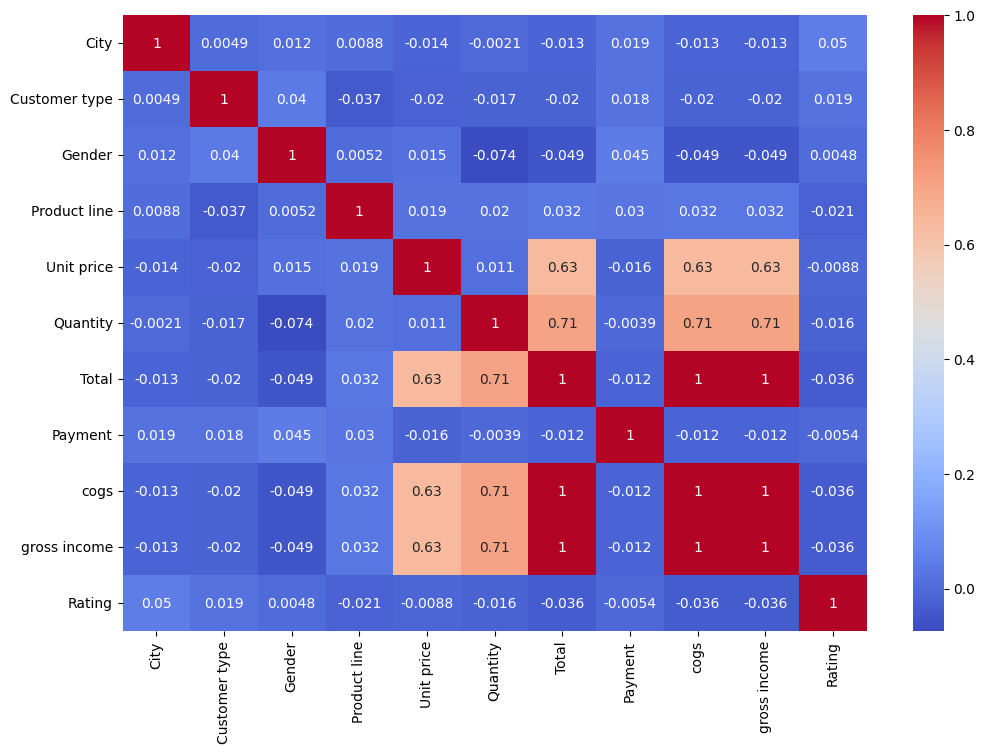

In [28]:
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

The correlation heatmap is insightful, as it illustrates that the variables with high correlation are indeed related and result from calculations involving one another. For example:

- Total = Quantity × Unit Price
- Gross Income = Gross Margin Percentage × COGS

Conversely, the remaining variables do not exhibit significant correlations. This observation further supports the notion that the data is non-linear, as there are no clear patterns or relationships among the other variables.

# Data Splitting and Model Training

The target variable for this prediction task is Rating. The dataset has been split into a training set and a test set, with 80% of the data (800 samples and 10 features) used for training and 20% (200 samples and 10 features) reserved for testing. The split was performed using a random state of 42 to ensure reproducibility. This split allows the model to learn from the training data and be evaluated on unseen data in the test set.

In [29]:
X = data.drop(columns=['Rating', 'cogs', 'gross income', 'Total'])
y = data['Rating']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (800, 7)
Test set size: (200, 7)


### Random Forest

In [32]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
predictions_rf = rf.predict(X_test)

### XGBoost

In [34]:
xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
predictions_xgb = xgb.predict(X_test)

### SVR

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
predictions_svr = svr.predict(X_test_scaled)

# Model Evaluation

In [37]:
def model_evaluation(y_test, predictions, model_name):
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    print(model_name)
    print("   Mean Squared Error (MSE):", mse)
    print("   Root Mean Squared Error (RMSE):", rmse)
    print("   R-squared (R²):", r2)
    print()

In [38]:
model_evaluation(y_test, predictions_rf, "Random Forest")
model_evaluation(y_test, predictions_xgb, "XGBoost")
model_evaluation(y_test, predictions_svr, "SVR")

Random Forest
   Mean Squared Error (MSE): 3.37176734
   Root Mean Squared Error (RMSE): 1.8362372776958864
   R-squared (R²): -0.09908316709042331

XGBoost
   Mean Squared Error (MSE): 3.486685221116799
   Root Mean Squared Error (RMSE): 1.8672667782394672
   R-squared (R²): -0.13654254551039813

SVR
   Mean Squared Error (MSE): 3.43484531807091
   Root Mean Squared Error (RMSE): 1.8533335690239117
   R-squared (R²): -0.11964447423916491



Based on the metric evaluation of the three models used above, the results are quite similar across all models. However, Random Forest performed the best, with an RMSE of 3.3718. Despite this, all three models still performed poorly overall, especially given that the target variable, rating, has a value range of only 4 to 10. An error close to 1.8 is relatively high, and the R² score is even negative in some cases, indicating that the models are not fitting well.

**Conclusion:** Due to the complexity of the data and the lack of clear patterns, further preprocessing and tuning may be necessary. Additionally, trying different models or even changing the target variable and algorithm could improve the performance.

# Prediction Result

         Feature  Importance
4     Unit price    0.465332
5       Quantity    0.175574
3   Product line    0.124007
6        Payment    0.076834
0           City    0.070037
2         Gender    0.044888
1  Customer type    0.043328


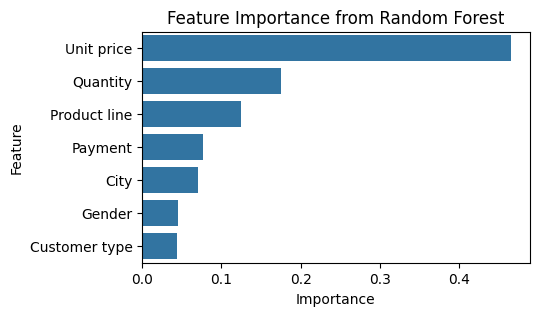

In [39]:
feature_importances = rf.feature_importances_

# save ke dataframe
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

# visualization
plt.figure(figsize=(5, 3))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [40]:
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

results = X_test_df.copy()
results['Actual_Rating'] = y_test.values
results['Predicted_Rating'] = predictions_xgb

results

,City,Customer type,Gender,Product line,Unit price,Quantity,Payment,Actual_Rating,Predicted_Rating
521,1,0,0,4,83.17,6,0,7.3,6.944895
737,1,1,1,0,58.76,10,2,9.0,5.993943
740,1,1,1,4,55.61,7,0,8.5,6.859105
660,0,1,0,5,42.97,3,0,9.3,7.261074
411,0,1,1,5,21.87,2,2,6.9,6.347682
...,...,...,...,...,...,...,...,...,...
408,2,1,0,4,56.53,4,2,5.5,6.410349
332,2,1,1,1,77.02,5,0,5.5,7.406546
208,0,1,0,1,30.37,3,2,5.1,7.413521
613,1,0,1,5,80.93,1,1,9.0,7.304769


In [41]:
# for col in cat_cols:
#     reverse_mapping = {v: k for k, v in encoders[col].items()}
#     data[col] = data[col].map(reverse_mapping)

In [42]:
# grupkan dan hitung rata-rata prediksi
aggregated_results = results.groupby(['Unit price', 'Product line', 'Gender']).agg({
    'Predicted_Rating': 'mean'
}).reset_index()

aggregated_results = aggregated_results.sort_values(by='Predicted_Rating', ascending=False)

print(aggregated_results.head(10))

     Unit price  Product line  Gender  Predicted_Rating
12        14.76             3       0          9.953438
170       91.61             2       0          8.672293
99        58.90             4       1          8.640498
13        14.82             3       1          8.631409
112       63.71             1       0          8.547810
152       81.68             1       0          8.436818
182       95.42             1       0          8.367068
10        14.48             1       0          8.334335
178       94.47             2       0          8.294827
86        51.54             5       0          8.253312


**Mapping for 'City':**
{'Mandalay': 0, 'Naypyitaw': 1, 'Yangon': 2}

**Mapping for 'Customer type':**
{'Member': 0, 'Normal': 1}

**Mapping for 'Gender':**
{'Female': 0, 'Male': 1}

**Mapping for 'Product line':**
{'Electronic accessories': 0, 'Fashion accessories': 1, 'Food and beverages': 2, 'Health and beauty': 3, 'Home and lifestyle': 4, 
'Sports and travel': 5}

**Mapping for 'Payment':**
{'Cash': 0, 'Credit card': 1, 'Ewallet': 2}

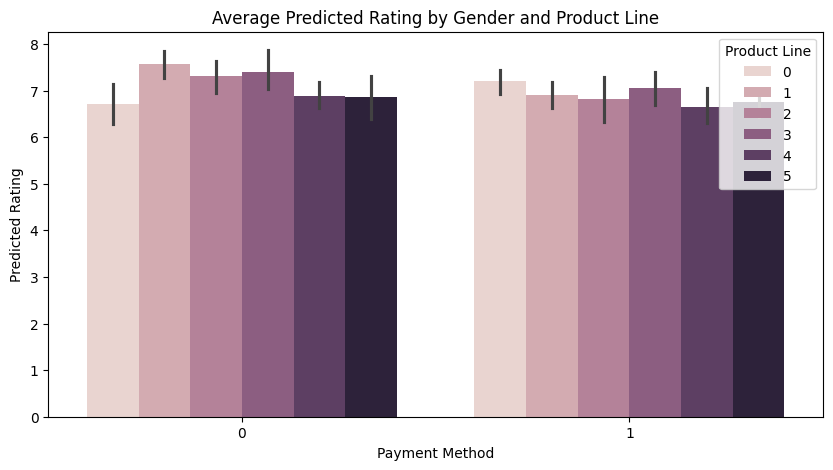

In [43]:
# visualisasi rata-rata prediksi berdasarkan kombinasi fitur
plt.figure(figsize=(10, 5))
sns.barplot(
    x='Gender',
    y='Predicted_Rating',
    hue='Product line',
    data=aggregated_results
)
plt.title('Average Predicted Rating by Gender and Product Line')
plt.ylabel('Predicted Rating')
plt.xlabel('Payment Method')
plt.legend(title='Product Line', loc='upper right')
plt.show()